In [1]:
import pandas as pd
import numpy as np
import pylab as plt

Set the global default size for matplotlib figures.<br>
Set the size of matlplotlib figures that contain subplots<br>
Set the size of matplotlib histogram bins

In [2]:
plt.rc('figure', figsize=(10,5))
figsize_with_subplots = (10,10)
bin_size = 10

### Explore the Data <br>
Read the data:

In [7]:
df_train = pd.read_csv("/Users/lydia/Projects/data-science-ipython-notebooks/data/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.
Get some basic information on the DataFrame:

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ideally all of these counts should be alike. Some data is missing in Age, Cabin, and Embarked.

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Plot some basic features: <br>
Set up a grid of plots:

In [27]:
fig = plt.figure(figsize=figsize_with_subplots)
fig_dims = (3,2)

<Figure size 1000x1000 with 0 Axes>

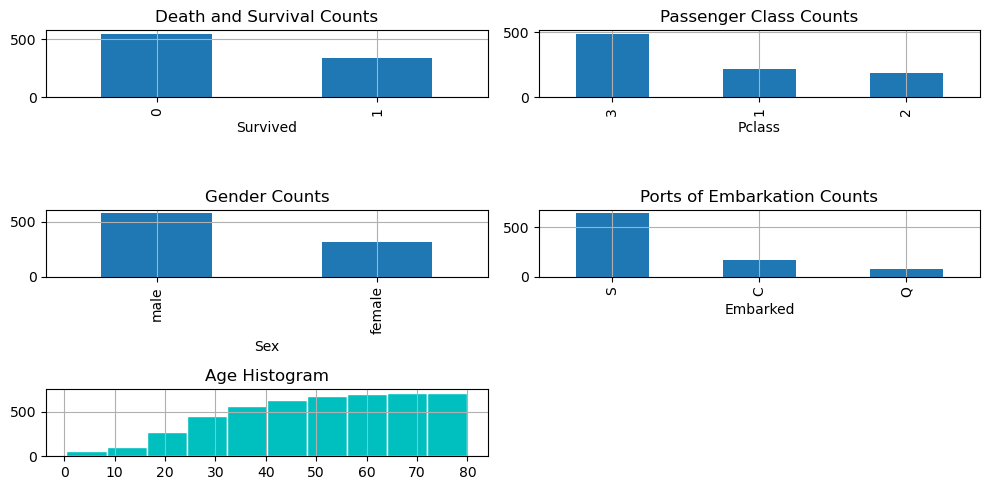

In [28]:
# Plot death and survival counts
plt.subplot2grid(fig_dims, (0,0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                        title='Death and Survival Counts'
                                        color='salmon')
plt.grid()
plt.tight_layout()

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0,1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                      title='Passenger Class Counts'
                                      color='goldenrod')
plt.grid()
plt.tight_layout()

#Plot Sex counts
plt.subplot2grid(fig_dims, (1,0))
df_train['Sex'].value_counts().plot(kind='bar',
                                   title='Gender Counts')
plt.grid()
plt.tight_layout()

#Plot of Embarked counts
plt.subplot2grid(fig_dims, (1,1))
df_train['Embarked'].value_counts().plot(kind='bar',
                                        title='Ports of Embarkation Counts')
plt.grid()
plt.tight_layout()

#Plot the Age histogram
plt.subplot2grid(fig_dims, (2,0))
df_train['Age'].hist(color="c", cumulative=True, edgecolor='white')
plt.title('Age Histogram')
plt.tight_layout()